# 实现网络中间层的featuremap的特征可视化

以resnet50为例,进行特征可视化

模型的定义来自于torchvision中的定义

针对特定的模型需要查找模型的定义,针对所需可视化的网络层的输出,然后导出特定的输出featuremap

In [1]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sys 
sys.path.append("..") 
import cfg
from data import get_test_transform

In [2]:
# 读取模型
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']  # 提取网络结构
    model.load_state_dict(checkpoint['model_state_dict'])  # 加载网络权重参数
    for parameter in model.parameters():
        parameter.requires_grad = False
    model.eval()
#     print(model)
#     for name in model.state_dict():
#         print(name)
    return model

In [7]:
# 对于给定的一个网络层的输出x,x为numpy格式的array,维度为[0, channels, width, height]
%matplotlib inline
def draw_features(width, height, channels,x,savename):
    '''
    x:        输入的array,某一层的网络层输出
    savename: 特征可视化的保存路径
    width, height: 分别表示可视化子图的个数,二者乘积等于channels
    '''
    fig = plt.figure(figsize=(32,32))
    fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.05, hspace=0.05)
    for i in range(channels):
        plt.subplot(height,width, i + 1)
        plt.axis('off')
        img = x[0, i, :, :]
        pmin = np.min(img)
        pmax = np.max(img)
        img = (img - pmin) / (pmax - pmin + 0.000001)
        plt.imshow(img, cmap='gray')
#         print("{}/{}".format(i, channels))
    fig.savefig(savename, dpi=300)
    fig.clf()
    plt.close()

In [8]:
savepath = './'
def predict(model):
    # 读入模型
    model = load_checkpoint(model)
    print('..... Finished loading model! ......')
    ##将模型放置在gpu上运行
    if torch.cuda.is_available():
        model.cuda()

    img = Image.open(img_path).convert('RGB')

    img = get_test_transform(size=cfg.INPUT_SIZE)(img).unsqueeze(0)

    if torch.cuda.is_available():
        img = img.cuda()
    with torch.no_grad():
        x = model.conv1(img)
        draw_features(8, 8, 64,  x.cpu().numpy(), "{}/f1_conv1.png".format(savepath))

..... Finished loading model! ......


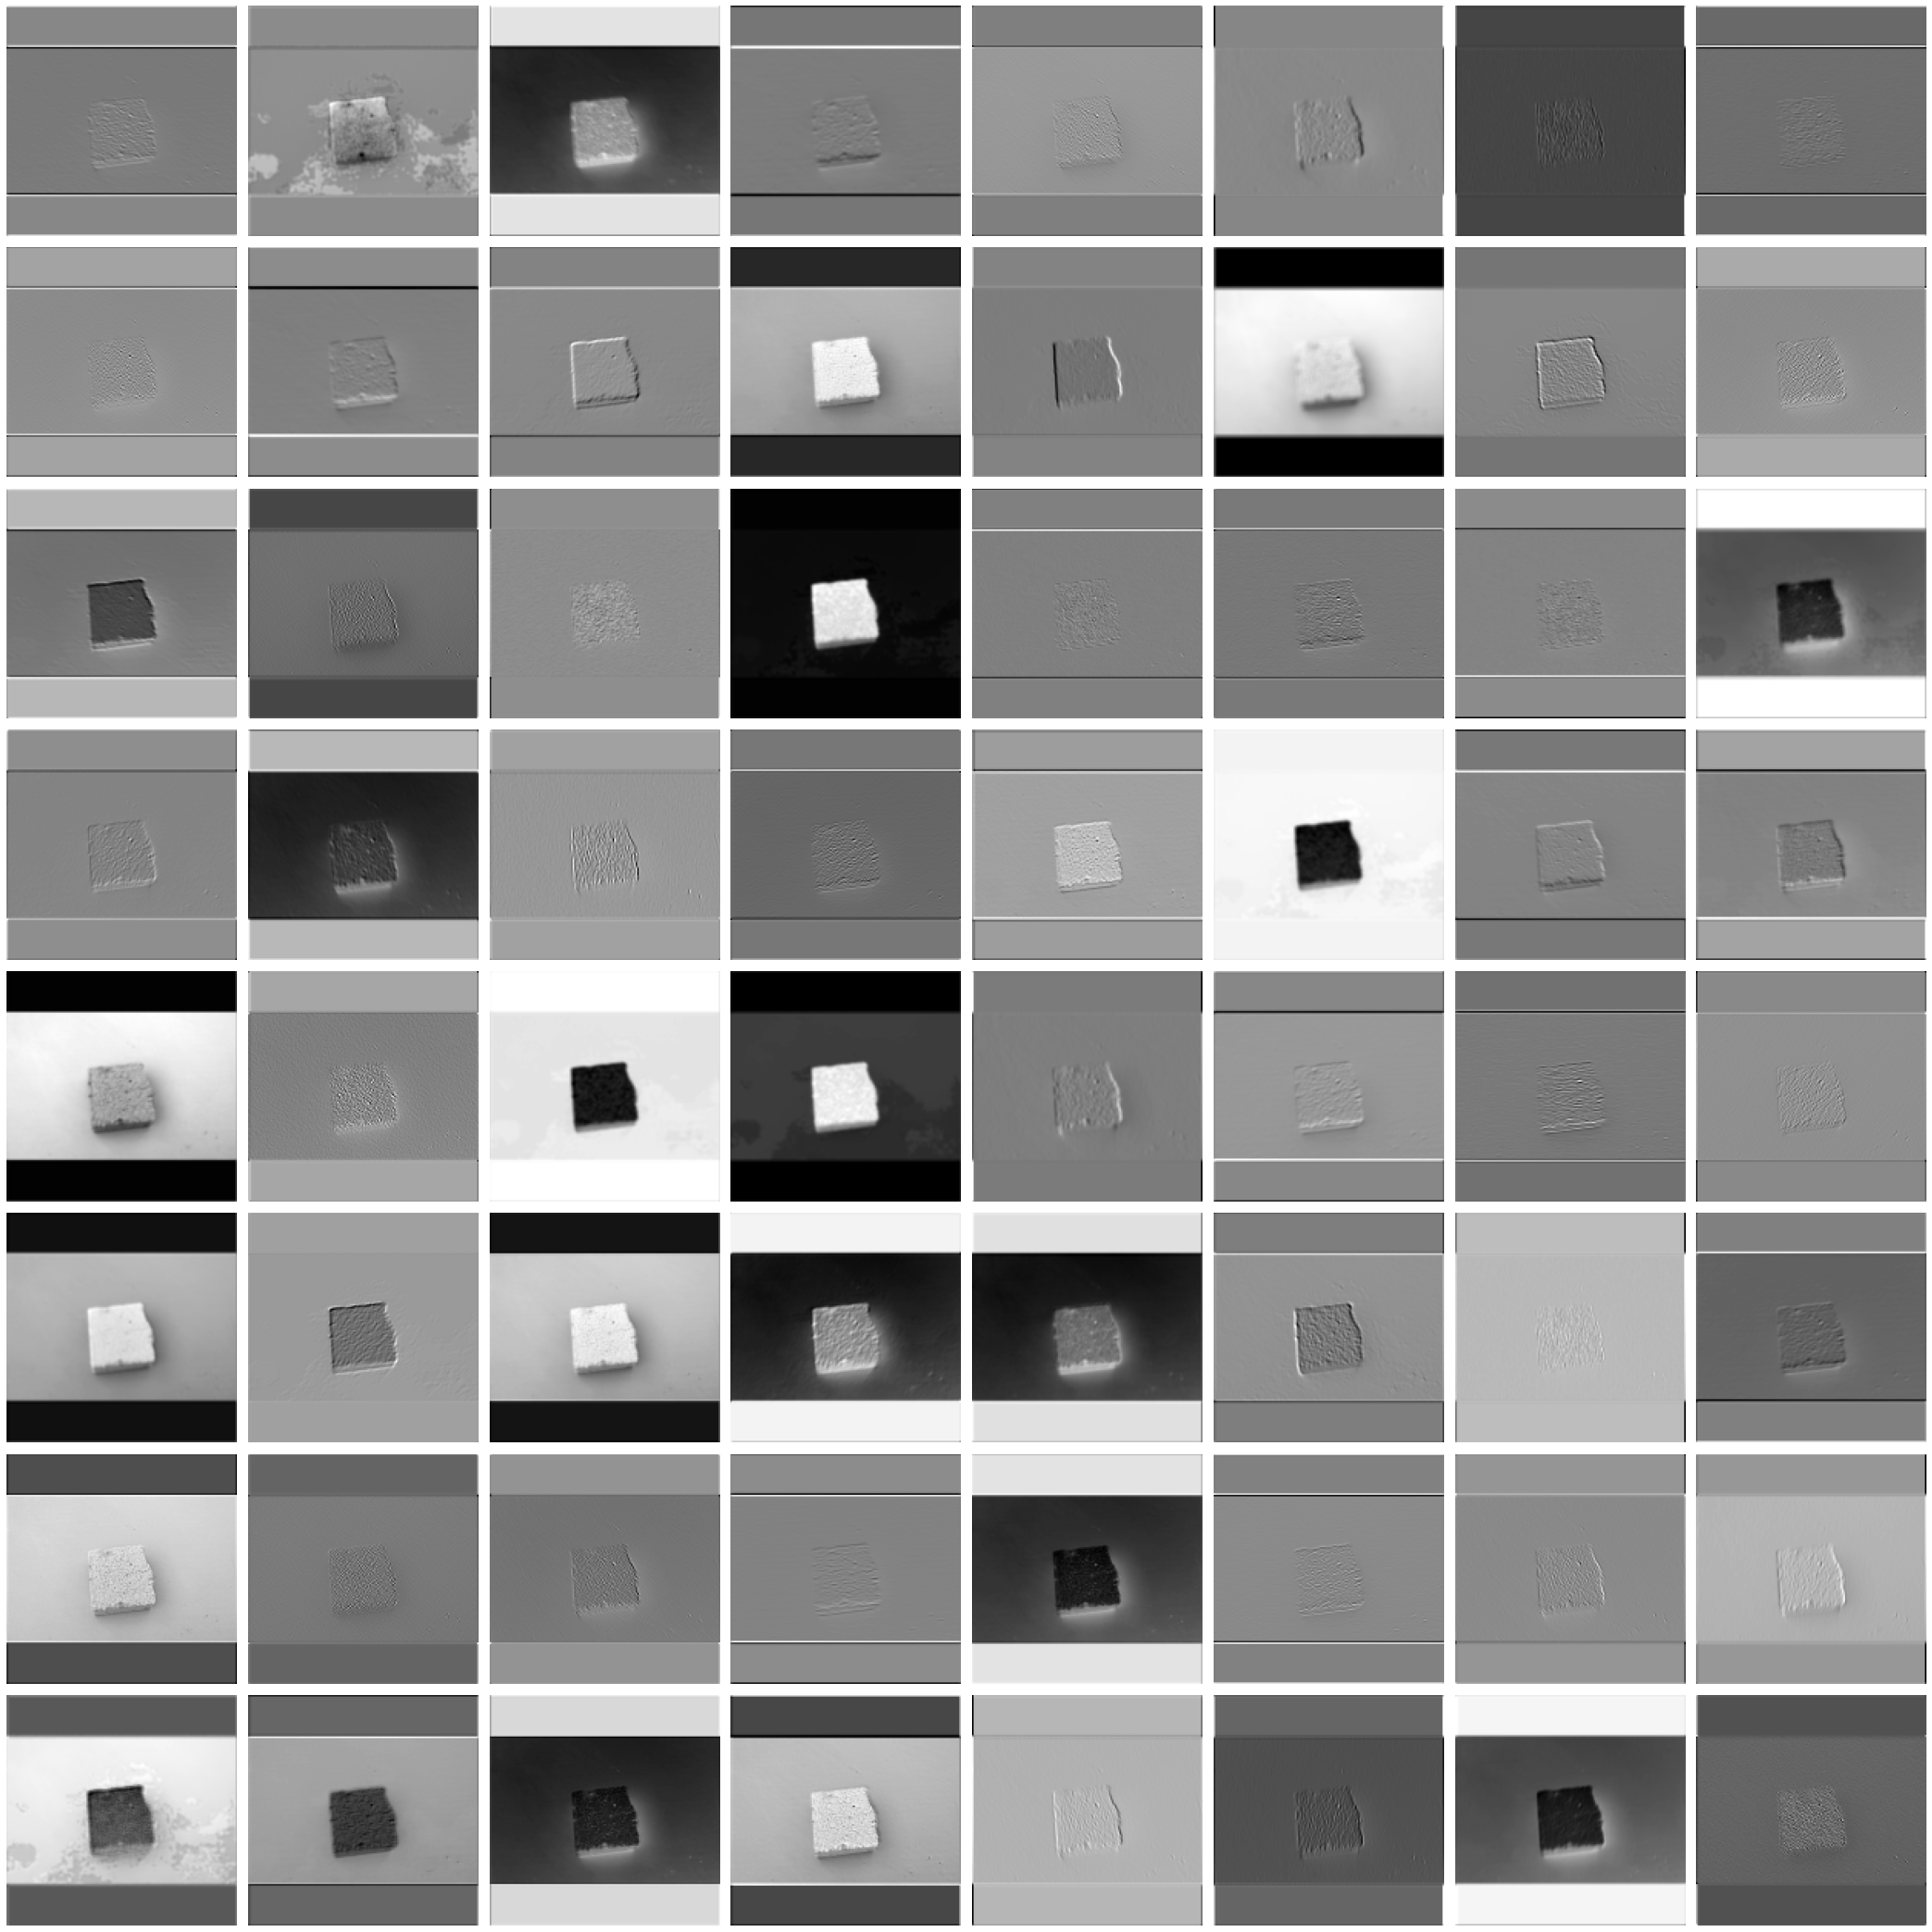

In [9]:
trained_model =  '/disk/haihua/weights/resnet50/epoch_39.pth'
img_path = './test.png'

predict(trained_model)